# Imports


In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import Lens, Simulation
from scipy import fftpack

## Constants

In [157]:

amplitude = 10000
sim_width = 5
pixel_size = 1e-3
n_slices = 1000

lens = Lens.Lens(
    diameter=sim_width,
    height=3,
    exponent=0.5,
    medium=Lens.Medium(2.348)
)

lens = Lens.Lens(diameter=5, height=3, exponent=0.5, medium=Lens.Medium(2.348))

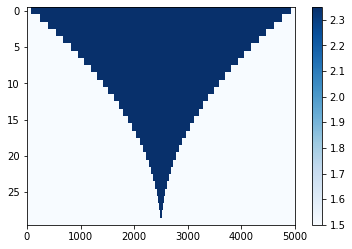

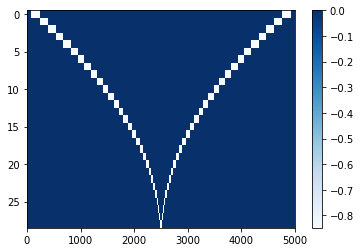

In [198]:
z_step = 0.1
# z_step = 2
rounding = 0
medium = Lens.Medium(1.5)

profile = lens.generate_profile(pixel_size)
interped_profile, phase_diff_profile = Simulation.generate_discrete_profile(profile, z_step, rounding, lens.medium, medium) 

plt.imshow(interped_profile, aspect='auto', interpolation='none', cmap='Blues')
plt.colorbar()
plt.show()

plt.imshow(phase_diff_profile, aspect='auto', interpolation='none', cmap='Blues')
plt.colorbar()
plt.show()

In [150]:
print(np.isclose(0., 1, rtol=1))
print(np.isclose(0., 1, rtol=0.99))
print(np.isclose(0.01, 1, rtol=0.99))


True
False
True


In [ ]:
profile = lens.generate_profile(pixel_size)


# pixels size is defined by the sim
# define a simulation width (includes padding)
# TODO: minimum padding?
# escape path: 10%
# padding: 30%
# pad the sides of the profile to match the sim width

centre_px = (len(profile) - 1) // 2 
print("CENTRE_PX: ", centre_px)

medium = Lens.Medium(refractive_index=1.0)

print("n_pixels_in_sim: ", len(profile), " pixel_size: ", pixel_size)

freq_array = Simulation.generate_squared_frequency_array(n_pixels=len(profile), pixel_size=pixel_size)

dfp = generate_profile()

for lens in simulation():
    for current_slice, previous_wavefront in lens():
        
        # phase = A * delta 
        # delta = (lens.medium.refractive_index - medium.refractive_index) * profile
        delta = dfp[i] * profile_height[i]
        phase = (2 * np.pi * delta / medium.wavelength_medium ) % (2 * np.pi)
        wavefront = A * np.exp(1j*phase)

        # current_wavefront = B * phase

        
        current_wavefront = fft(wavefront)
        wavefront = current_wavefront * previous_wavefront

        z = lens.step_size_z
        prop = np.exp(1j * medium.wave_number * z)  * np.exp( (-1j * 2 * np.pi ** 2 * z * freq_array) / medium.wave_number)
        propagation = fftpack.ifft(prop * wavefront)
        output = np.sqrt(propagation.real**2 + propagation.imag**2)
        sim[i] = output
        # pass the propagation through as the previous wavefront
        # previous slice index profile 


    # having grabbed the last wavefront from the lens:
    wavefront = fftpack.fft(wavefront)

    sim = np.ones(shape=(n_slices, len(profile)))
    # distances defined from the previous lens 
    # define entire array to calculate faster on GPU
    # check here for GPU, CPU options ?
    distances = np.linspace(start_distance, finish_distance, n_slices)
    for i, z in enumerate(distances):
        
        prop = np.exp(1j * medium.wave_number * z)  * np.exp( (-1j * 2 * np.pi ** 2 * z * freq_array) / medium.wave_number)
        # print("prop shape: ", prop.shape)
        propagation = fftpack.ifft(prop * wavefront)

        output = np.sqrt(propagation.real**2 + propagation.imag**2)

        sim[i] = output



## VISUALISATION


In [ ]:
    print("Prop Size: ", len(prop))

    print(lens)
    print(medium)

    fig, ax = plt.subplots(3, 1, figsize=(15,15))

    ax[0].plot(profile)
    ax[0].set_title("PROFILE")

    ax[1].plot(phase)
    ax[1].set_title("PHASE")

    # print(sim.shape)
    ax[2].set_title("SIM")
    low, high = sim.shape[1] //2 - 1000, sim.shape[1] //2 + 1000 
    # print(low, high)
    ax[2].imshow(sim[:, low:high+1],  aspect="auto")

    plt.show()
